## Load and See

In [2]:
import nibabel as nib
from glob import glob

In [ ]:
# # Plot Format
# fig, ax = plt.subplots()
# ax.imshow(anat.get_fdata()[:, 128, :].T, origin='lower', cmap='gray')

In [ ]:
# %load ../brain_data/workspace/3d_brain/src/slice_viewer.py

In [69]:
def path(sub_id: int, task='func'):
    
    sub_id = str(sub_id).zfill(2)
    files = glob(f'./false_belief/sub-{sub_id}/{task}/*.gz')
    
    if task == 'func':
        return files
    
    elif task == 'anat':
        return nib.load(files[0]) if len(files) == 1 else files

In [70]:
def read_all(pth):
    
    if isinstance(pth, int):
        pth = path(pth)
        
    elif isinstance(pth, list):
        pass
    
    else: pass
    
    return list(map(nib.load, pth))

In [71]:
anat = path(2, 'anat')

In [74]:
anat.get_fdata().shape

(256, 256, 256)

In [48]:
run01, run02 = read_all(3)

In [55]:
run01.get_fdata()[0, ...].shape

(72, 36, 179)

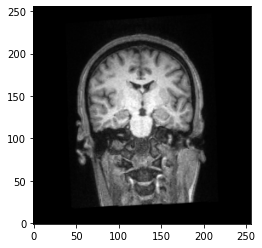

In [77]:
fig, ax = plt.subplots()
ax.imshow(anat.get_fdata()[:, 128, :].T, origin='lower', cmap='gray')

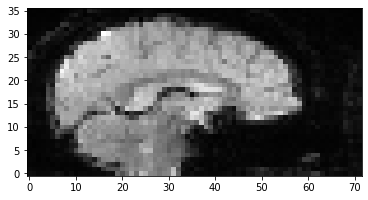

In [78]:
fig, ax = plt.subplots()
ax.imshow(run01.get_fdata()[..., 100][36, :, :].T, cmap="gray", origin="lower")

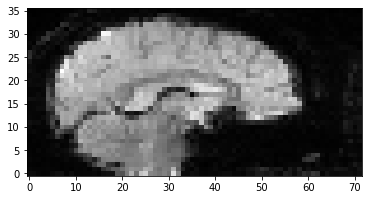

In [61]:
fig, ax = plt.subplots()
ax.imshow(run01.get_fdata()[..., 20][36, :, :].T, cmap="gray", origin="lower")

In [57]:
run01.get_fdata()[0, ...][36, :, :]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## PySurfer

In [1]:
%gui qt

In [3]:
from surfer import Brain

"""
Define the three important variables.
Note that these are the first three positional arguments
in tksurfer (and pysurfer for that matter).
"""
subject_id = 'fsaverage'
hemi = 'lh'
surf = 'inflated'

"""
Call the Brain object constructor with these
parameters to initialize the visualization session.
"""
brain = Brain(subject_id, hemi, surf, subjects_dir='C:/Users/pha/PySurfer/subjects/')